In [1]:
import sys

from SALib.analyze import morris
from SALib.analyze import fast
from SALib.analyze import sobol
from SALib.analyze import delta
from SALib.sample.morris import sample
from SALib.plotting.morris import horizontal_bar_plot, covariance_plot, sample_histograms

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# import forward model
# from model import model

mpl.rcParams['lines.linewidth'] = 3

In [3]:
PARAM_DIM = 5
problem = {
 'num_vars': PARAM_DIM,
 'names': ['A', 'beta_e', 'nu_s', 'nu_i', 'tr'],
 'groups': None,
 'bounds': [[10., 1200.],
            [5.e-5, 1.e-3],
            [1.e-7, 1.e-4],
            [5.e-9, 5.e-6],
            [0.2, 20.]]
}

In [4]:
# Generate samples. Number of samples are N * (num_paramsa+1)
# param_values = sample(problem, N=200, num_levels=4,
#                       optimal_trajectories=None)

results_path = '../../Results/Sensitivity/param_dim_5/'

param_values = np.loadtxt(results_path + 'samples_param_dim_5.txt')

# save samples 
# np.savetxt('samples.txt', param_values)

In [5]:
# run model on generated samples
# model_out = []

# for i in range(len(param_values)):
    
#     print('Running model with {}th sample: {}'.format(i, param_values[i]))
    
#     model_out.append(model(param_values[i], 'qoi/', str(i), 0))

# model_out = np.array(model_out, dtype=np.float32)
# np.savetxt('model_out.txt', model_out)

In [7]:
# run model on generated samples
qoi_inf = np.loadtxt(results_path + 'total_qoi_infected_param_dim_5.txt')
qoi_inf_last = qoi_inf[:, -1]

In [8]:
qoi_inf

array([[  66327.25509531,   77455.28503019,   85291.26516518, ...,
         255052.63480006,  269836.44929317,  284364.73411706],
       [  66315.19124474,   76181.9222441 ,   80918.50357999, ...,
         103308.34588355,  105741.80607401,  108409.13551544],
       [  66392.54403659,   79895.8336163 ,   90387.41390224, ...,
         161027.31566795,  167369.12297749,  174299.6798134 ],
       ...,
       [  66488.97715482,   90322.7763616 ,  153270.66596762, ...,
        5168538.33421929, 5357154.21936458, 5528495.22477163],
       [  66412.30386436,   81892.12026834,   98265.83782004, ...,
        1058131.86080963, 1160933.31520813, 1262304.08656141],
       [  66405.28842175,   80903.66146002,   93800.0142962 , ...,
         224095.18200745,  235611.5188408 ,  248137.56510295]])

In [9]:
qoi_inf.shape

(1200, 20)

In [10]:
qoi_dec = np.loadtxt(results_path + 'total_qoi_deceased_param_dim_5.txt')
qoi_dec_last = qoi_dec[:, -1]

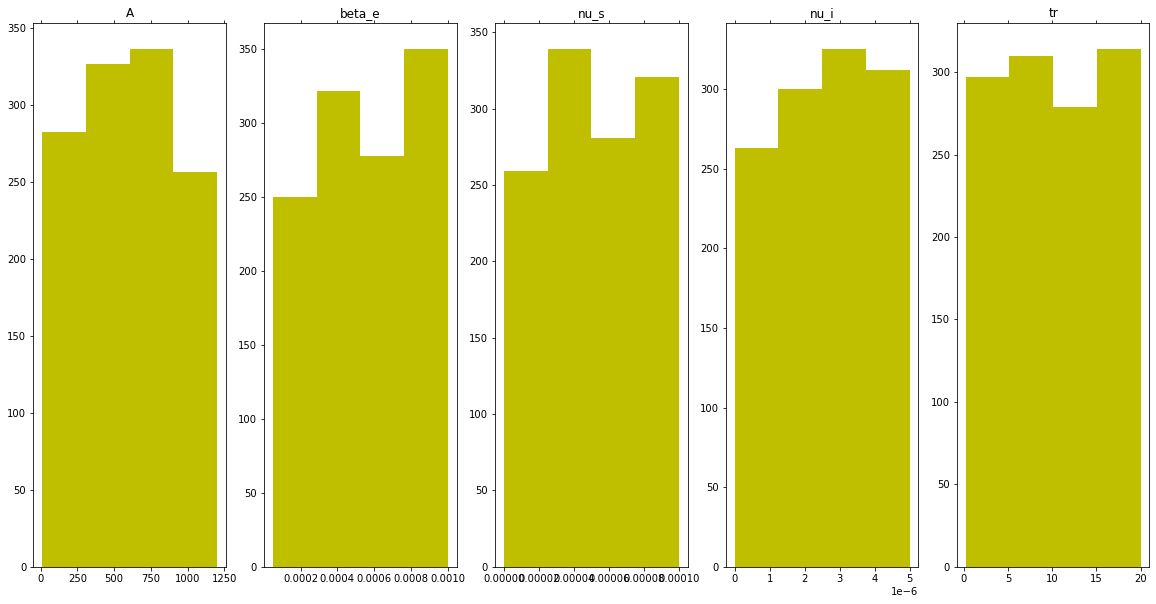

In [11]:
fig = plt.figure(figsize=(20,10))
sample_histograms(fig, param_values, problem, {'color': 'y'})
plt.show()

# QoI: Total infected population

In [12]:
print('Sensitity for total infected cases\n')
Si_inf = morris.analyze(problem, param_values, qoi_inf_last, conf_level=0.95,
                    print_to_console=True,
                    num_levels=4, num_resamples=200)
print('\nSensitity for total deceased cases\n')
Si_dec = morris.analyze(problem, param_values, qoi_dec_last, conf_level=0.95,
                    print_to_console=True,
                    num_levels=4, num_resamples=200)

Sensitity for total infected cases

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
A                              884636.300 -884636.300      212716.607 1604739.028
beta_e                         656713.679 579488.698      203443.953 1455353.240
nu_s                           846618.923 -846618.923      232187.807 1690454.513
nu_i                             7238.775  -7233.964        2602.934  18316.803
tr                             228239.882 228239.882       35273.233 265390.801

Sensitity for total deceased cases

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
A                                   0.008     -0.008           0.004      0.028
beta_e                              0.012      0.011           0.006      0.040
nu_s                                0.044      0.039           0.010      0.070
nu_i                                0.112      0.008           0.007      0.121
tr                                  0.003 

In [13]:
df_inf = Si_inf.to_df()
df_dec = Si_dec.to_df()

In [14]:
df_inf_sort = df_inf.sort_values(by=['mu_star'])
df_dec_sort = df_dec.sort_values(by=['mu_star'])

In [15]:
inf_mu_star_sorted = []
inf_mu_star_conf_sorted = []
inf_param_names_sort = []

dec_mu_star_sorted = []
dec_mu_star_conf_sorted = []
dec_param_names_sort = []

for i in range(PARAM_DIM):
    inf_mu_star_sorted.append(df_inf_sort['mu_star'][i])
    inf_param_names_sort.append(df_inf_sort['mu_star'].index[i])
    inf_mu_star_conf_sorted.append(df_inf_sort['mu_star_conf'][i])
    
    dec_mu_star_sorted.append(df_dec_sort['mu_star'][i])
    dec_param_names_sort.append(df_dec_sort['mu_star'].index[i])
    dec_mu_star_conf_sorted.append(df_dec_sort['mu_star_conf'][i])
    
# mu_star_sorted, param_names_sort, mu_star_conf_sorted

In [16]:
#['A', 'beta_e', 'nu_s', 'nu_i', 'gamma_e', 'gamma_r', 'gamma_d', 'sigma', 'tr']

def name_to_symbol(pn):
    if pn == 'A':
        return r'$A$'
    elif pn == 'beta_e':
        return r'$\beta_e$'
    elif pn == 'nu_s':
        return r'$\nu_s$'
    elif pn == 'nu_i':
        return r'$\nu_i$'
    elif pn == 'gamma_e':
        return r'$\gamma_e$'
    elif pn == 'gamma_r':
        return r'$\gamma_r$'
    elif pn == 'gamma_d':
        return r'$\gamma_d$'
    elif pn == 'sigma':
        return r'$\sigma$'
    elif pn == 'tr':
        return r'$R$'
    elif pn == 'infected':
        return r'$\int \phi_i dx$'
    elif pn == 'deceased':
        return r'$\int \phi_d dx$'

In [17]:
# Plot sensitivity and variation

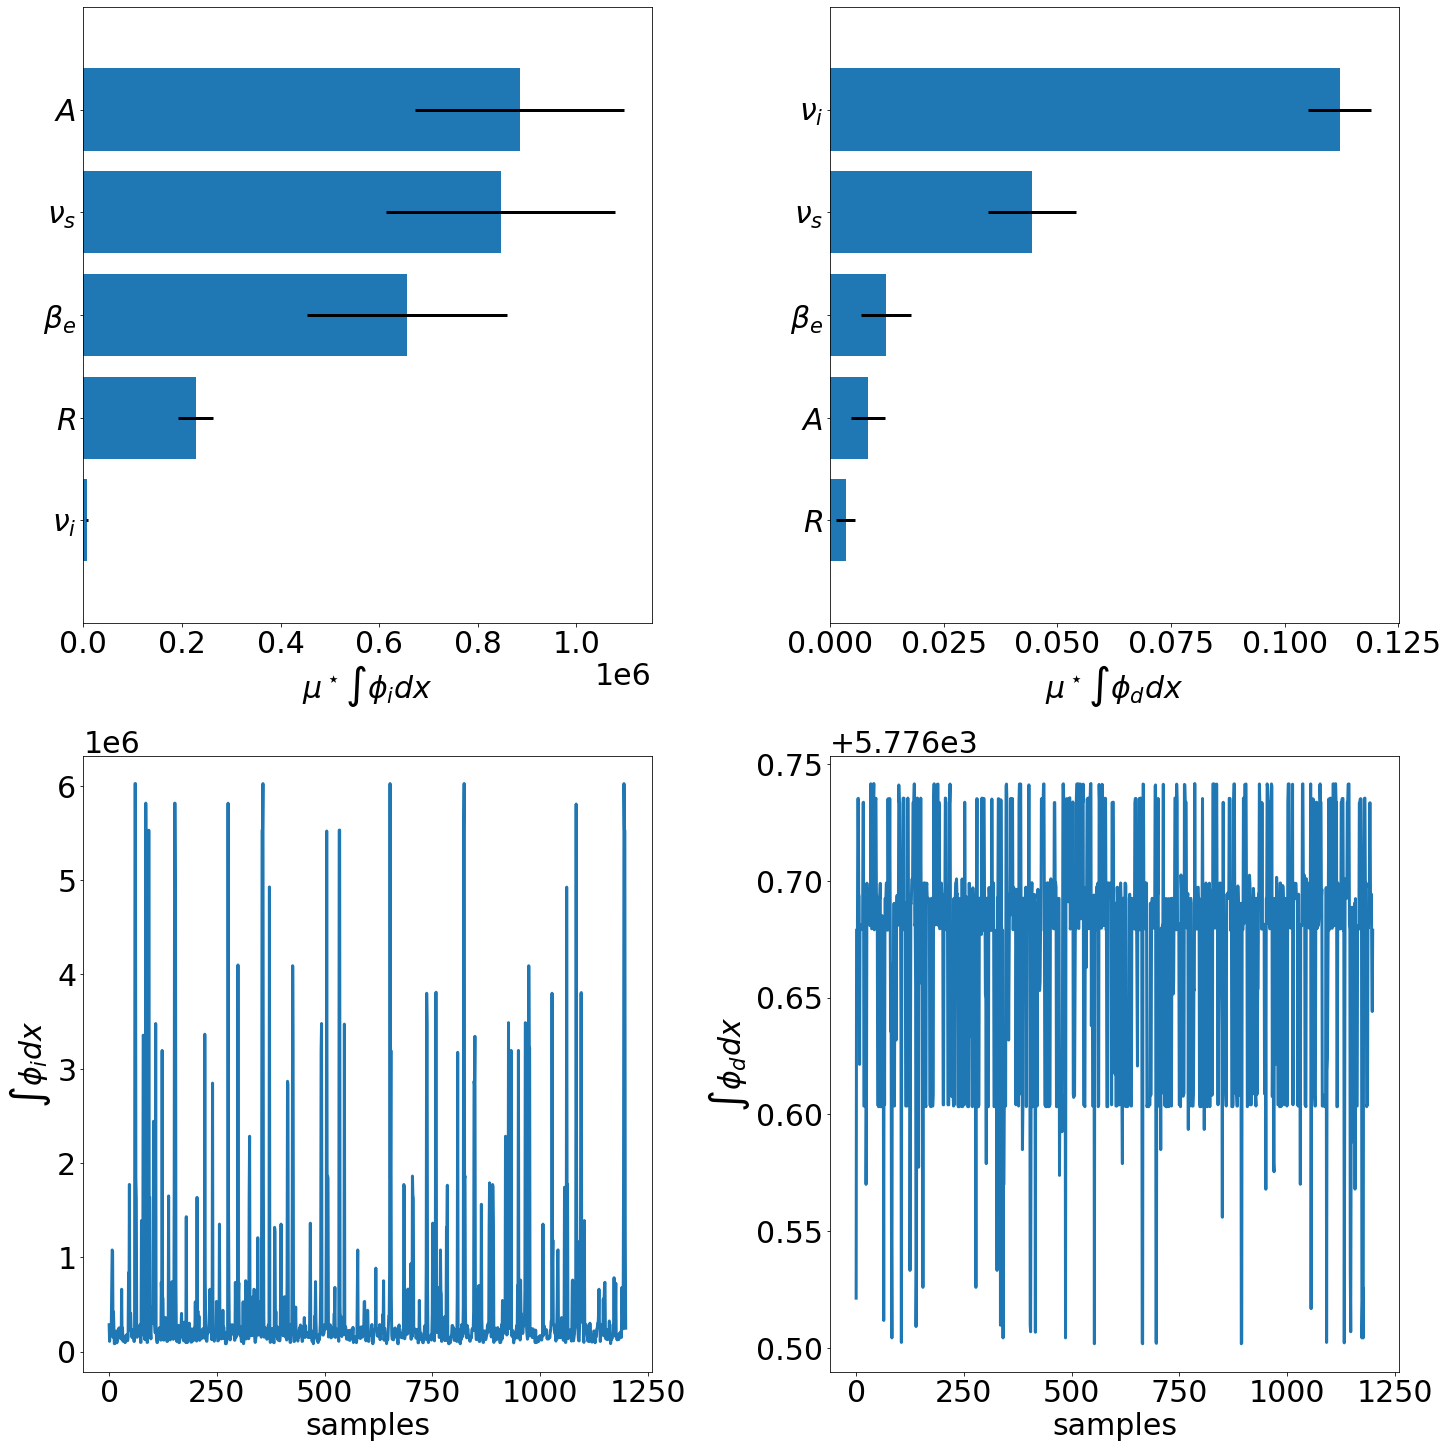

In [18]:
# Plot horizontal barchart
plt.rcParams.update({'font.size': 30})
fig, axes = plt.subplots(2, 2, figsize=(20,20), constrained_layout=True)

# len(axes)

y_pos = np.arange(len(inf_mu_star_sorted))
inf_plot_names = [name_to_symbol(a) for a in inf_param_names_sort]
dec_plot_names = [name_to_symbol(a) for a in dec_param_names_sort]

# plot inf sensitivity
axes[0][0].barh(y_pos,
              inf_mu_star_sorted,
              xerr=inf_mu_star_conf_sorted,
              align='center',
              ecolor='black')
axes[0][0].set_yticks(y_pos)
axes[0][0].set_yticklabels(inf_plot_names)
axes[0][0].set_xlabel(r'$\mu^\star$' + name_to_symbol('infected'))
axes[0][0].set_ylim(min(y_pos)-1, max(y_pos)+1)

# plot dec sensitivity
axes[0][1].barh(y_pos,
              dec_mu_star_sorted,
              xerr=dec_mu_star_conf_sorted,
              align='center',
              ecolor='black')
axes[0][1].set_yticks(y_pos)
axes[0][1].set_yticklabels(dec_plot_names)
axes[0][1].set_xlabel(r'$\mu^\star$' + name_to_symbol('deceased'))
axes[0][1].set_ylim(min(y_pos)-1, max(y_pos)+1)

# plot inf QoI
axes[1][0].plot(qoi_inf_last)
axes[1][0].set_xlabel('samples')
axes[1][0].set_ylabel(name_to_symbol('infected'))

# plot dec QoI
axes[1][1].plot(qoi_dec_last)
axes[1][1].set_xlabel('samples')
axes[1][1].set_ylabel(name_to_symbol('deceased'))

plt.savefig('sensitivity_param_dim_5.pdf')

plt.show()

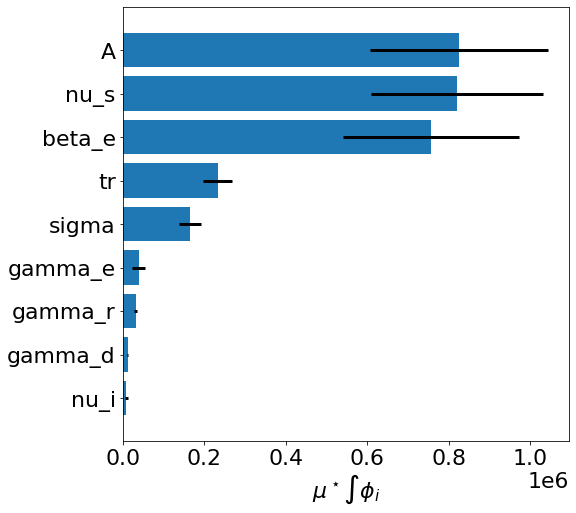

In [20]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(8,8))
horizontal_bar_plot(ax, Si, {}, sortby='mu_star', unit=r"$\int \phi_i$")
plt.show()

Parameter S1 S1_conf ST ST_conf
A -0.029701 0.054396 0.239050 0.313948
beta_e 0.014930 0.121203 0.507200 0.568878
nu_s 0.027217 0.119942 0.591425 0.571412
nu_i 0.176003 0.360702 1.012439 0.594430
gamma_e 0.171444 0.369558 1.334239 0.824840
gamma_r 0.210200 0.388063 1.156710 0.658146
gamma_d 0.223615 0.390764 1.329119 0.764237
sigma 0.097226 0.179602 1.153628 0.824527
tr 0.078691 0.202918 1.170165 0.905952

Parameter_1 Parameter_2 S2 S2_conf
A beta_e -0.003016 0.154788
A nu_s 0.031761 0.179997
A nu_i -0.074658 0.406660
A gamma_e -0.088850 0.412046
A gamma_r -0.105968 0.435999
A gamma_d -0.153117 0.442112
A sigma -0.014496 0.237109
A tr -0.053470 0.207698
beta_e nu_s -0.019784 0.229939
beta_e nu_i -0.057581 0.520937
beta_e gamma_e -0.099350 0.489632
beta_e gamma_r -0.122297 0.508667
beta_e gamma_d -0.232435 0.483702
beta_e sigma -0.094664 0.288896
beta_e tr -0.121053 0.249049
nu_s nu_i -0.171541 0.456780
nu_s gamma_e -0.175589 0.460950
nu_s gamma_r -0.188442 0.489176
nu_s gamma_d -0.2213

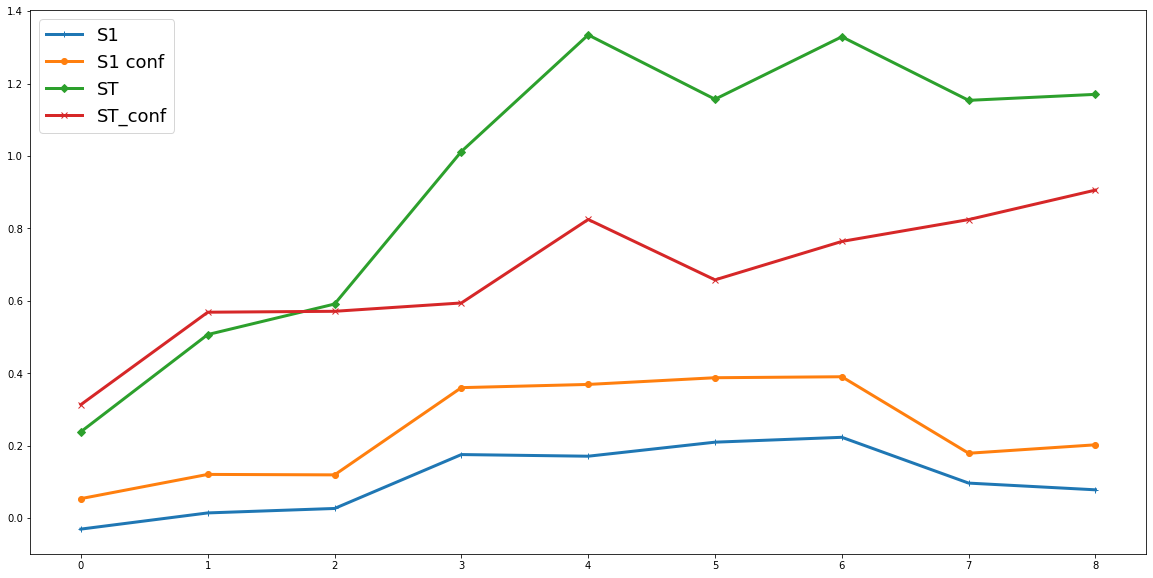

In [11]:
Si = sobol.analyze(problem, Y=qoi_inf_last, calc_second_order=True, conf_level=0.95, print_to_console=True)
# Returns a dictionary with keys 'S1' and 'ST'
# e.g. Si['S1'] contains the first-order index for each parameter, in the
# same order as the parameter file

plt.figure(figsize=(20,10))
plt.plot(Si['S1'], label='S1', marker='+')
plt.plot(Si['S1_conf'], label='S1 conf', marker='o')
plt.plot(Si['ST'], label='ST', marker='D')
plt.plot(Si['ST_conf'], label='ST_conf', marker='x')
plt.legend(fontsize='18')
plt.show()

Parameter delta delta_conf S1 S1_conf
A 0.246261 0.014233 0.094448 0.018953
beta_e 0.283091 0.009549 0.095101 0.011803
nu_s 0.374264 0.030202 0.316253 0.043566
nu_i 0.131640 0.005570 0.011863 0.004989
gamma_e 0.131179 0.004420 0.012497 0.007010
gamma_r 0.131273 0.007183 0.023798 0.004857
gamma_d 0.157830 0.005979 0.021196 0.002820
sigma 0.133101 0.006687 0.014340 0.010160
tr 0.145844 0.006615 0.024393 0.007722


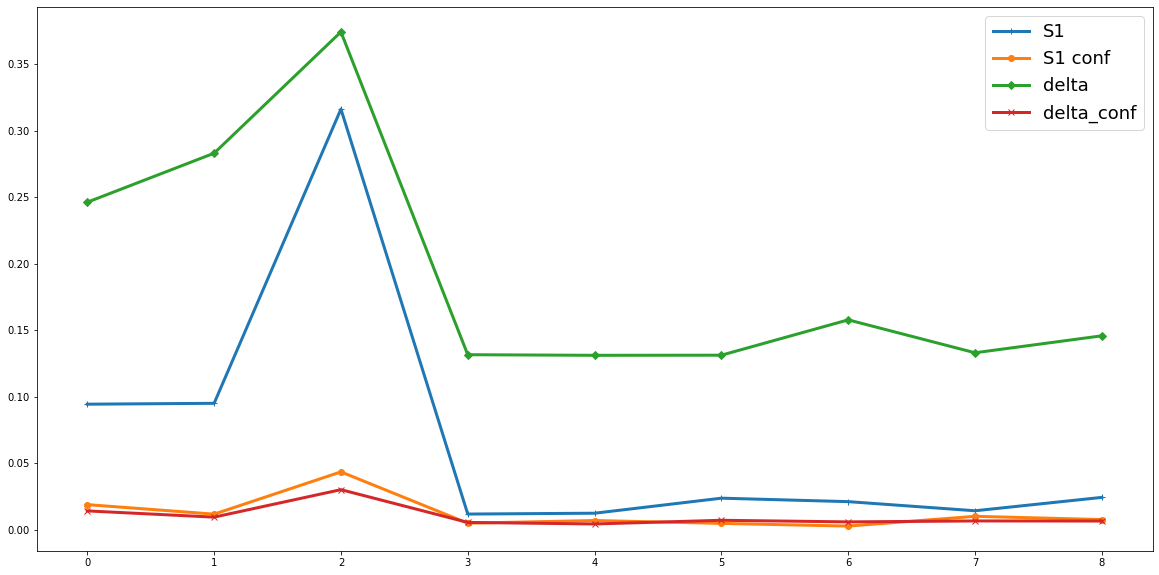

In [12]:
Si = delta.analyze(problem, param_values, qoi_inf_last, num_resamples=10, conf_level=0.95, print_to_console=True)
# Returns a dictionary with keys 'delta', 'delta_conf', 'S1', 'S1_conf'

plt.figure(figsize=(20,10))
plt.plot(Si['S1'], label='S1', marker='+')
plt.plot(Si['S1_conf'], label='S1 conf', marker='o')
plt.plot(Si['delta'], label='delta', marker='D')
plt.plot(Si['delta_conf'], label='delta_conf', marker='x')
plt.legend(fontsize='18')
plt.show()

# QoI: Total deceased population

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
A                                   0.006     -0.002           0.003      0.021
beta_e                              0.011      0.006           0.005      0.042
nu_s                                0.056      0.045           0.012      0.091
nu_i                                0.212      0.163           0.044      0.336
gamma_e                             0.001     -0.000           0.001      0.004
gamma_r                          1616.855  -1616.855         116.971    928.921
gamma_d                          5823.505   5823.505         255.308   1760.105
sigma                            4243.346   4243.346         278.087   1865.232
tr                                  0.003      0.001           0.002      0.013


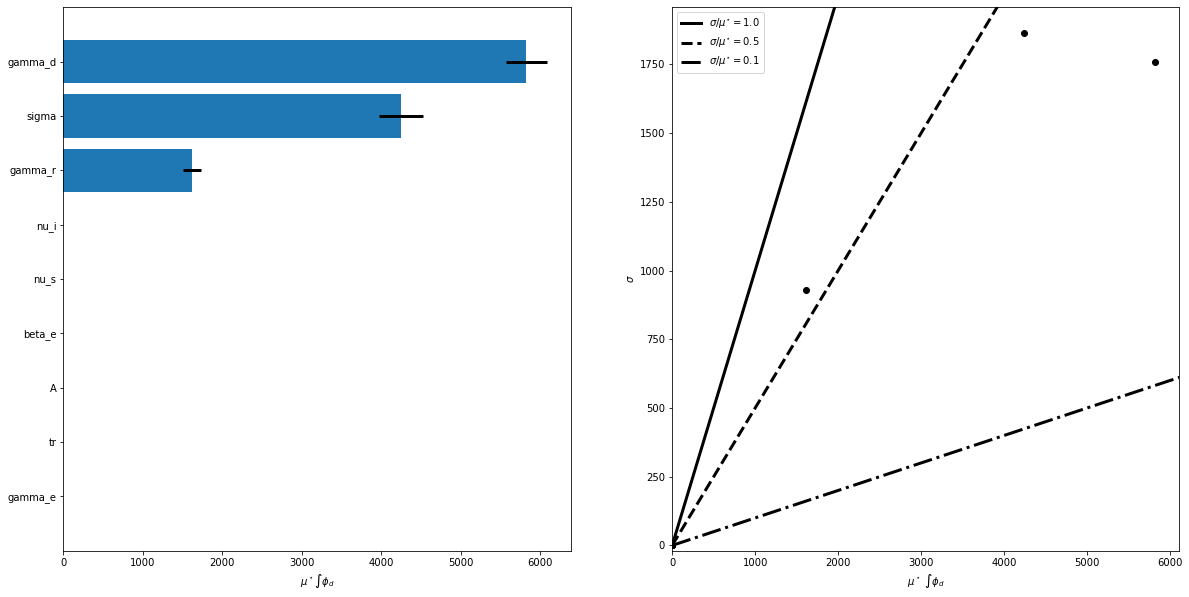

In [13]:
Si = morris.analyze(problem, param_values, qoi_dec_last, conf_level=0.95,
                    print_to_console=True,
                    num_levels=4, num_resamples=200)

# print(str(Si['delta']))
# plt.figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
horizontal_bar_plot(ax1, Si, {}, sortby='mu_star', unit=r"$\int \phi_d$")
covariance_plot(ax2, Si, {}, unit=r"$\int \phi_d$")
plt.show()

Parameter S1 S1_conf ST ST_conf
A 0.065100 0.084462 0.138713 0.070738
beta_e 0.026366 0.163330 0.332341 0.113114
nu_s -0.078690 0.216600 0.492765 0.128722
nu_i -0.070677 0.249341 0.648206 0.167969
gamma_e -0.098568 0.241993 0.777972 0.209951
gamma_r -0.023134 0.287177 0.897596 0.209546
gamma_d 0.035580 0.375415 1.244278 0.244515
sigma -0.004854 0.401805 1.442090 0.249743
tr 0.086747 0.399426 1.642835 0.284203

Parameter_1 Parameter_2 S2 S2_conf
A beta_e -0.237036 0.360990
A nu_s -0.028287 0.312781
A nu_i -0.131019 0.319730
A gamma_e -0.080392 0.295794
A gamma_r -0.102285 0.369855
A gamma_d -0.170331 0.443989
A sigma -0.050273 0.461742
A tr -0.160461 0.376574
beta_e nu_s 0.078480 0.308406
beta_e nu_i 0.035836 0.329977
beta_e gamma_e 0.058395 0.313767
beta_e gamma_r 0.058985 0.374998
beta_e gamma_d -0.024489 0.470600
beta_e sigma 0.080614 0.481540
beta_e tr -0.033558 0.430307
nu_s nu_i 0.126167 0.354413
nu_s gamma_e 0.131649 0.336525
nu_s gamma_r 0.144627 0.384699
nu_s gamma_d 0.044779 0

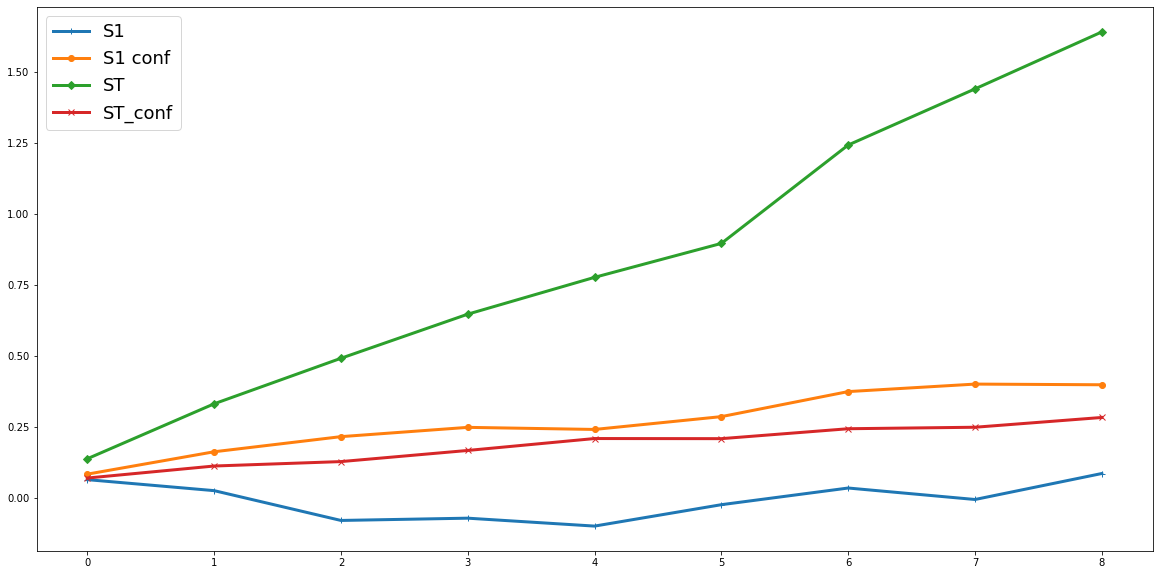

In [14]:
Si = sobol.analyze(problem, Y=qoi_dec_last, calc_second_order=True, conf_level=0.95, print_to_console=True)
# Returns a dictionary with keys 'S1' and 'ST'
# e.g. Si['S1'] contains the first-order index for each parameter, in the
# same order as the parameter file

plt.figure(figsize=(20,10))
plt.plot(Si['S1'], label='S1', marker='+')
plt.plot(Si['S1_conf'], label='S1 conf', marker='o')
plt.plot(Si['ST'], label='ST', marker='D')
plt.plot(Si['ST_conf'], label='ST_conf', marker='x')
plt.legend(fontsize='18')
plt.show()

Parameter delta delta_conf S1 S1_conf
A 0.074442 0.006771 0.014808 0.007514
beta_e 0.062931 0.006985 0.013833 0.005376
nu_s 0.080070 0.007735 0.009474 0.008222
nu_i 0.063350 0.008073 0.008510 0.009018
gamma_e 0.082450 0.007489 0.021370 0.004392
gamma_r 0.083083 0.007184 0.037868 0.012561
gamma_d 0.384286 0.014993 0.587418 0.020524
sigma 0.203420 0.014303 0.295047 0.048058
tr 0.062917 0.008373 0.013073 0.006657


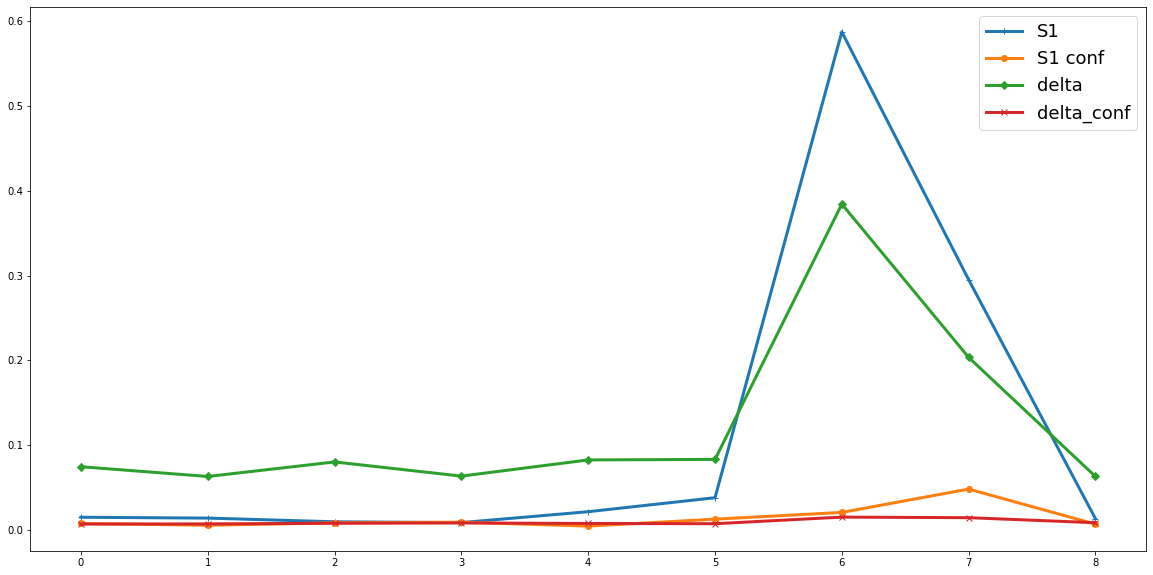

In [15]:
Si = delta.analyze(problem, param_values, qoi_dec_last, num_resamples=10, conf_level=0.95, print_to_console=True)
# Returns a dictionary with keys 'delta', 'delta_conf', 'S1', 'S1_conf'

plt.figure(figsize=(20,10))
plt.plot(Si['S1'], label='S1', marker='+')
plt.plot(Si['S1_conf'], label='S1 conf', marker='o')
plt.plot(Si['delta'], label='delta', marker='D')
plt.plot(Si['delta_conf'], label='delta_conf', marker='x')
plt.legend(fontsize='18')
plt.show()

# Plot QoI

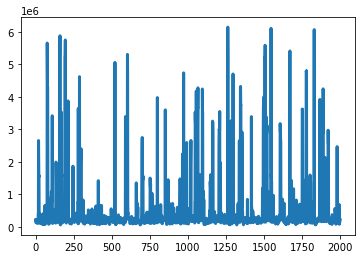

In [16]:
plt.plot(qoi_inf_last)

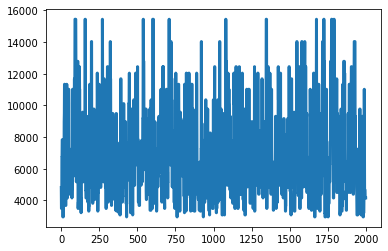

In [17]:
plt.plot(qoi_dec_last)